# Heart Disease Prediction using Classification Models and Neural Networks

This project aims to predict whether or not a given patient has heart disease given various indicators and symptoms. The data is taken from the following website: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Manipulation and Preprocessing
The following few kernels are used to manipulate and process data for analysis.

In [91]:
df = pd.read_csv(r"C:\Users\Jason Lam\Downloads\heart_statlog_cleveland_hungary_final.csv")

In [92]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [93]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.dropna(inplace=True)

In [96]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Implementing Models
The following code focuses on implementing and evaluating various Classification Models.

In [62]:
X = df.drop('target',axis=1)
y = df['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
clf = LogisticRegression()

In [65]:
clf.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
y_pred = clf.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test, y_pred)

In [68]:
accuracy

0.8260869565217391

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
forest_pred = forest.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, forest_pred)

In [73]:
accuracy

0.8804347826086957

In [74]:
from sklearn.naive_bayes import GaussianNB

In [75]:
gnb = GaussianNB()

In [76]:
g_pred = gnb.fit(X_train, y_train).predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, g_pred)

## Implementing the Neural Network

In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [79]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [80]:
# Convert to numpy arrays if they are pandas objects
def to_numpy(array_like):
    if hasattr(array_like, 'values'):  # pandas Series/DataFrame
        return array_like.values
    elif hasattr(array_like, 'numpy'):  # TensorFlow tensor
        return array_like.numpy()
    else:  # numpy array or list
        return np.array(array_like)

# Convert all y arrays
y_train = to_numpy(y_train)
y_val = to_numpy(y_val)
y_test = to_numpy(y_test)

# Then proceed with reshaping for binary classification
if num_classes == 2:
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

In [81]:
if num_classes == 2:
    # Reshape to ensure proper dimensions (from (587,) to (587, 1))
    y_train = y_train.reshape(-1, 1)
    y_val = y_val.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    
    print(f"After reshaping - y_train shape: {y_train.shape}")
    
    # Build binary classification model
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')  # Single output neuron
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

After reshaping - y_train shape: (587, 1)


C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
# 5. Train the model
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6148 - loss: 0.6518 - precision: 0.6134 - recall: 0.8691 - val_accuracy: 0.8299 - val_loss: 0.5205 - val_precision: 0.8022 - val_recall: 0.9125 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7788 - loss: 0.5122 - precision: 0.7736 - recall: 0.8575 - val_accuracy: 0.8367 - val_loss: 0.4119 - val_precision: 0.8333 - val_recall: 0.8750 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.4496 - precision: 0.8097 - recall: 0.8586 - val_accuracy: 0.8435 - val_loss: 0.3792 - val_precision: 0.8434 - val_recall: 0.8750 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8172 - loss: 0.4360 - precision: 0.8503 - recall: 0.8158 - val_accuracy: 0.8367 - val_loss: 0.3757 - val_precision: 0.8333 - val_recall: 0.8750 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.83

In [86]:
# 6. Evaluate the model
# Evaluate on test set - use the appropriate y_test format
if num_classes > 2:
    # For multi-class: use one-hot encoded labels for evaluation
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test_categorical, verbose=0)
else:
    # For binary: use original labels (reshaped to match model output)
    test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test.reshape(-1, 1), verbose=0)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Make predictions
y_pred_proba = model.predict(X_test)

if num_classes > 2:
    y_pred = np.argmax(y_pred_proba, axis=1)
    # For multi-class, we need the original labels (not one-hot) for classification_report
    y_test_for_report = np.argmax(y_test_categorical, axis=1) if y_test_categorical.shape[1] > 1 else y_test
else:
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()
    # For binary, use the original labels
    y_test_for_report = y_test.flatten() if len(y_test.shape) > 1 else y_test

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_for_report, y_pred))


Test Accuracy: 0.8587
Test Precision: 0.9091
Test Recall: 0.8411
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



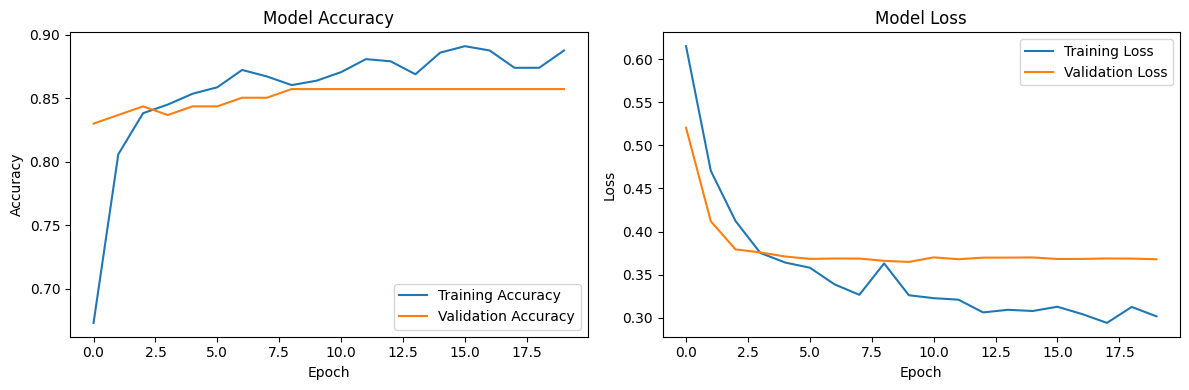

Model saved as 'classification_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Predicted class: 0, Confidence: 1.0000
Actual class: [0]


C:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [87]:
# 7. Plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

# 8. Save the model
model.save('classification_model.h5')
print("Model saved as 'classification_model.h5'")

# 9. Example of loading and using the model for prediction
def predict_new_sample(model, scaler, sample):
    """Predict class for a new sample"""
    sample_scaled = scaler.transform(sample.reshape(1, -1))
    prediction = model.predict(sample_scaled)
    
    if num_classes > 2:
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)
    else:
        predicted_class = 1 if prediction > 0.5 else 0
        confidence = prediction[0][0] if predicted_class == 1 else 1 - prediction[0][0]
    
    return predicted_class, confidence

# Example prediction
sample = X_test[0]  # Use a test sample for demonstration
pred_class, confidence = predict_new_sample(model, scaler, sample)
print(f"\nPredicted class: {pred_class}, Confidence: {confidence:.4f}")
print(f"Actual class: {y_test[0]}")

In [88]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8586956521739131

## Conclusion

The best performing Model was not, in fact, the Neural Network, but the Random Forest Classifier. This suggests that using a Neural Network in such a scenario would actually be detrimental due to the increased resource usage for a less accurate result. Of course, this is not absolute as this still depends on the Data itself.

Points of further refinement include:
1) Larger quantity of data. These observations provided in the dataset still only encompass a small part of the true population of people who may or may not suffer from heart disease.
2) Other AI or models such as some form of Clustering may be even better.
3) Adjusted Learning rates and Epochs. The Neural Network may simply be worse due to a lack of adjustment in its parameters.